In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

In [ ]:
# Define as cores
color1 = 'chartreuse'
color2 = 'crimson'
color3 = 'dodgerblue'
color4 = 'fuchsia'

1 Questão 1

1.1 (a)

In [ ]:
# Gera uma caminhada aleatória
def walk(arr, n):
  for i in range(n):
    x = random.random() - 0.5
    arr[0][i] = arr[0][i-1] + x

    y = random.random() - 0.5
    arr[1][i] = arr[1][i-1] + y

In [ ]:
# Gera, imprime e retorna 4 caminhadas aleatórias
def run4(n, print = False):
  x, y, z, w = np.zeros((2,n)), np.zeros((2,n)), np.zeros((2,n)), np.zeros((2,n))

  walk(x,n)
  walk(y,n)
  walk(z,n)
  walk(w,n)

  if print == True:
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(x[0], x[1], color=color1)
    plt.plot(y[0], y[1], color=color2)
    plt.plot(z[0], z[1], color=color3)
    plt.plot(w[0], w[1], color=color4)
  return x, y, z, w

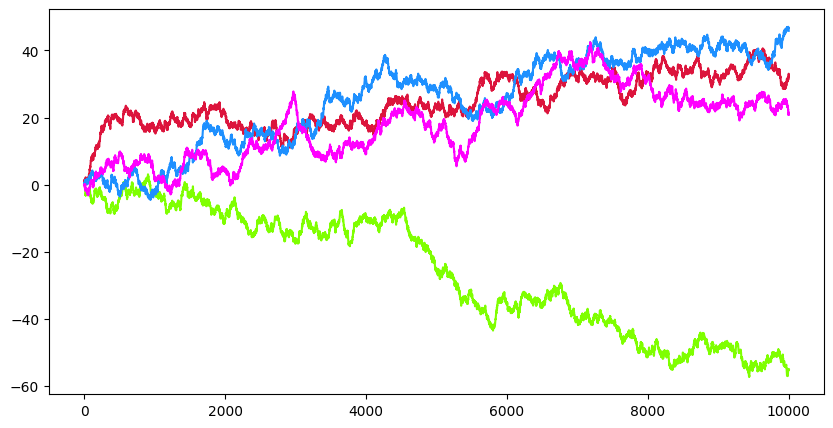

In [ ]:
# Mostra o caminho no eixo x para 4 caminhadas
n = 10000
x, y, z, w = run4(n,False)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x[0], color1);
plt.plot(y[0], color2);
plt.plot(z[0], color3);
plt.plot(w[0], color4);

1.2 (b)

In [ ]:
# Encontra a posição final
def end_points(arr):
  x = arr[0][len(arr[0])-1]
  y = arr[1][len(arr[0])-1]
  return x, y

In [ ]:
# Cálculo da distância
def displacement(arr):
  x_1 = arr[0][0]
  y_1 = arr[1][0]
  x_2, y_2 = end_points(arr)
  return ((x_2 - x_1)**2 + (y_2 - y_1)**2)**0.5

1.2.1 N = 10

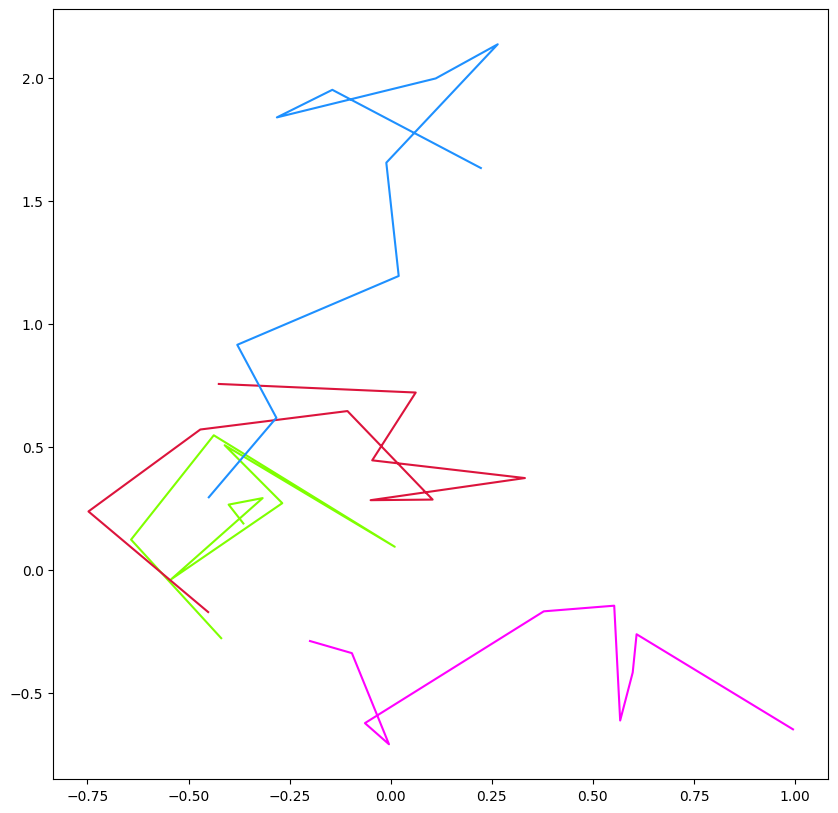

In [ ]:
x,y,z,w = run4(10,True);

# Lista com distâncias
displacements = np.zeros((3,4))

displacements[0][0] = displacement(x)
displacements[0][1] = displacement(y)
displacements[0][2] = displacement(z)
displacements[0][3] = displacement(w)

1.2.2 N = 1000

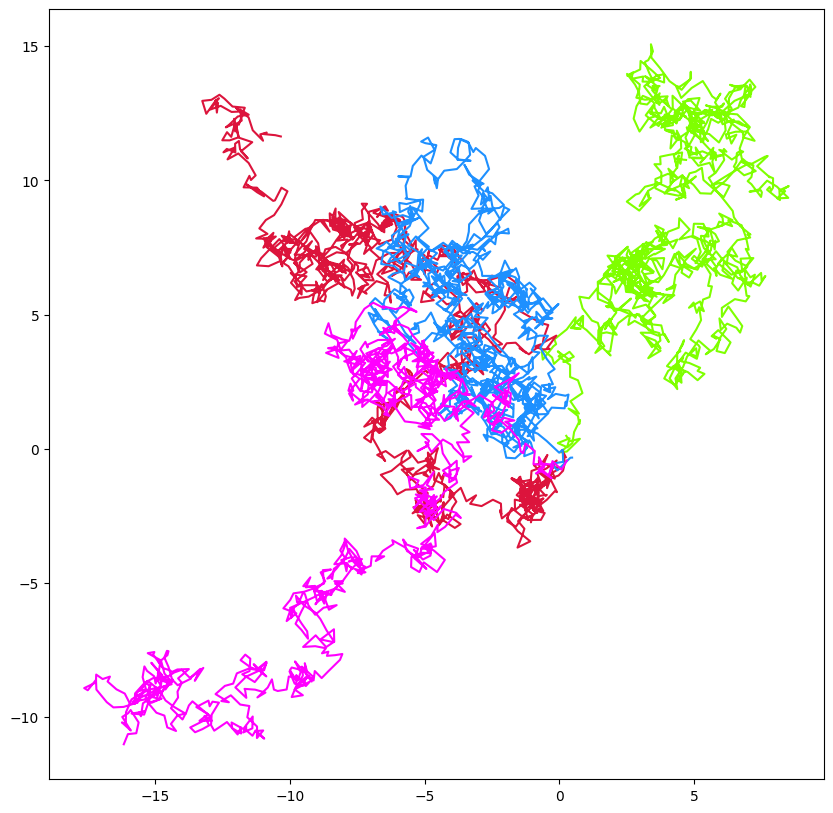

In [ ]:
x,y,z,w = run4(1000,True)

displacements[1][0] = displacement(x)
displacements[1][1] = displacement(y)
displacements[1][2] = displacement(z)
displacements[1][3] = displacement(w)

N = 100000

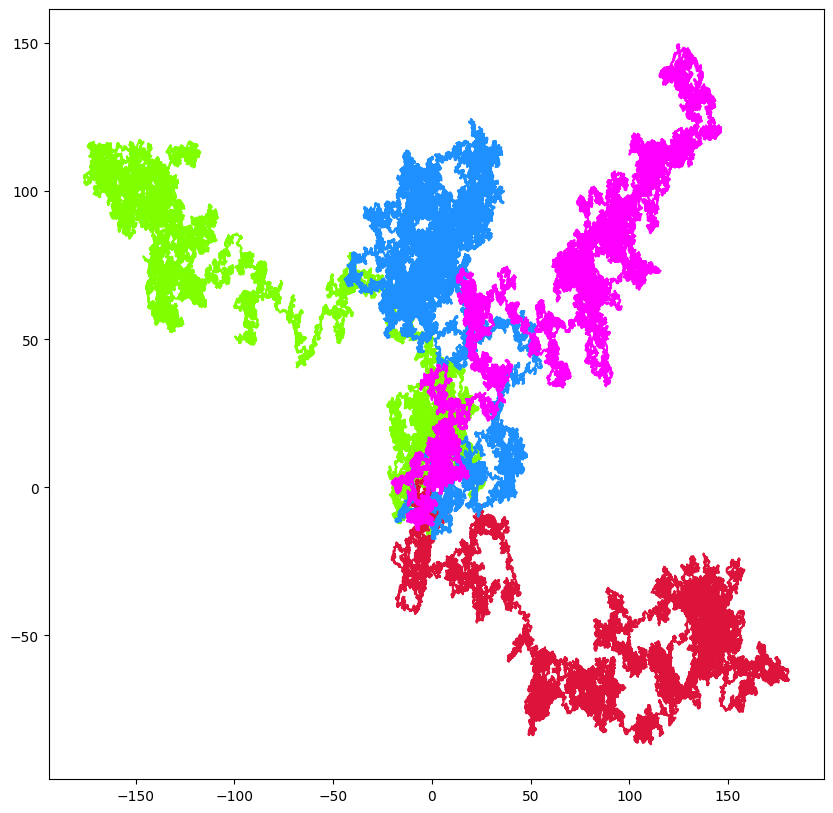

In [ ]:
x,y,z,w = run4(100000,True)

displacements[2][0] = displacement(x)
displacements[2][1] = displacement(y)
displacements[2][2] = displacement(z)
displacements[2][3] = displacement(w)

In [ ]:
displacements

array([[  0.46937   ,   0.92741175,   1.49778835,   1.24721228],
       [ 11.19778374,  15.95219792,   9.67507844,  19.53465046],
       [167.12898948, 150.78246105, 103.73627405, 194.54562313]])

In [ ]:
d_1 = np.sum(displacements[2]) / np.sum(displacements[1])
d_2 = np.sum(displacements[1]) / np.sum(displacements[0])
d_mean = (d_1 + d_2) / 2
d_mean

12.270411173790471

Os valores obtidos nos mostram que multiplicar o número de passos por 100 aumenta a distância final por cerca de 10 vezes.

2 Questão 2

2.1 (a)

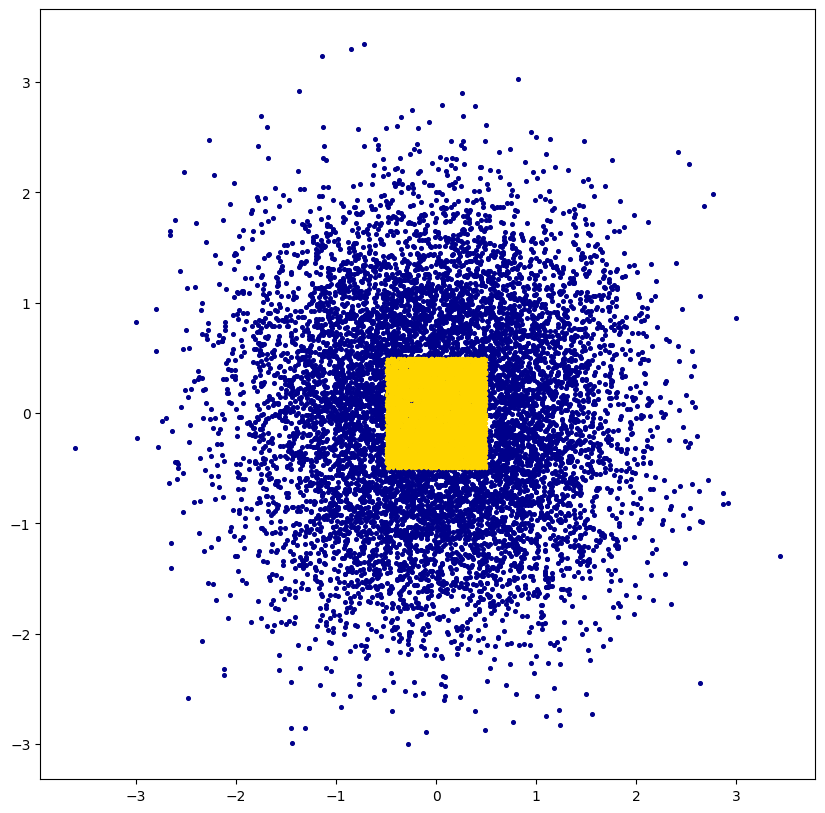

In [ ]:
# Verifica a simetria
w = 10000

n = 1
coord1 = np.zeros((2,w))

for i in range(w):
  rw = np.zeros((2,n))
  walk(rw,n)
  x, y = end_points(rw)
  coord1[0][i] = x
  coord1[1][i] = y

n = 10
coord10 = np.zeros((2,w))

for i in range(w):
  rw = np.zeros((2,n))
  walk(rw,n)
  x, y = end_points(rw)
  coord10[0][i] = x
  coord10[1][i] = y

plt.rcParams['figure.figsize'] = [10, 10]
ax = plt.gca()
ax.scatter(coord10[0],coord10[1],color='darkblue', s=7);
ax.scatter(coord1[0],coord1[1],color='gold', s=2);

2.2 (b)

In [ ]:
# Gera uma caminhada aleatória 1d
def walk1d(arr, n):
  for i in range(n):
    x = random.random() - 0.5
    arr[i] = arr[i-1] + x

In [ ]:
# Imprime o histograma e a gaussiana para w=10000 caminhadas e n passos
def distribution(n):
  w = 10000
  disps = np.zeros(w)
  for i in range(w):
    x = np.zeros(n)
    walk1d(x,n)
    disps[i] = x[n-1]

  plt.rcParams['figure.figsize'] = [10,5]
  mean = 0
  sigma = np.std(disps)
  _,bins,_ = plt.hist(disps,bins=50, color='darkcyan',histtype='stepfilled',density=True,range=(-3*sigma,3*sigma));
  RMS = sigma / np.sqrt(n)
  print('RMS = ' + str(RMS))
  best_fit_line = norm.pdf(bins, mean, sigma)
  plt.xlim(-3*sigma,3*sigma)
  plt.plot(bins, best_fit_line,color='darkorange', linewidth=5)

RMS = 0.2892326567848788


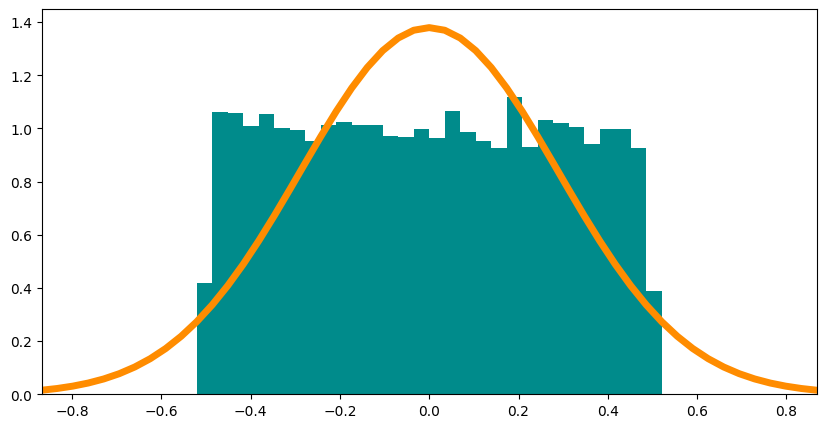

In [ ]:
distribution(1);

RMS = 0.2894872526645997


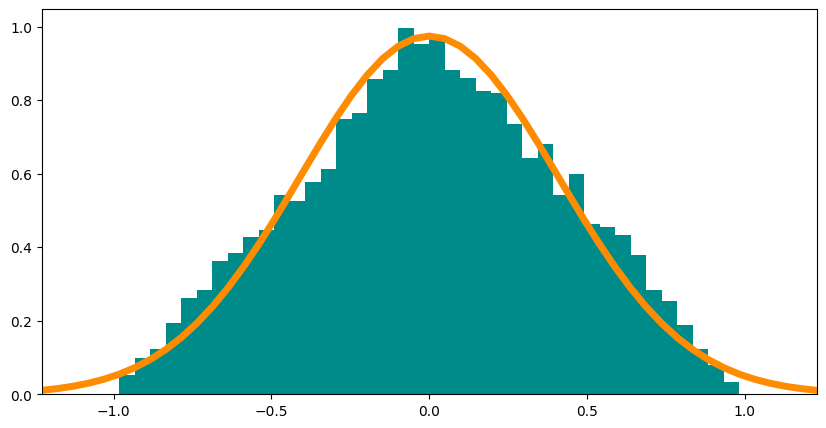

In [ ]:
distribution(2);

RMS = 0.2899478510347402


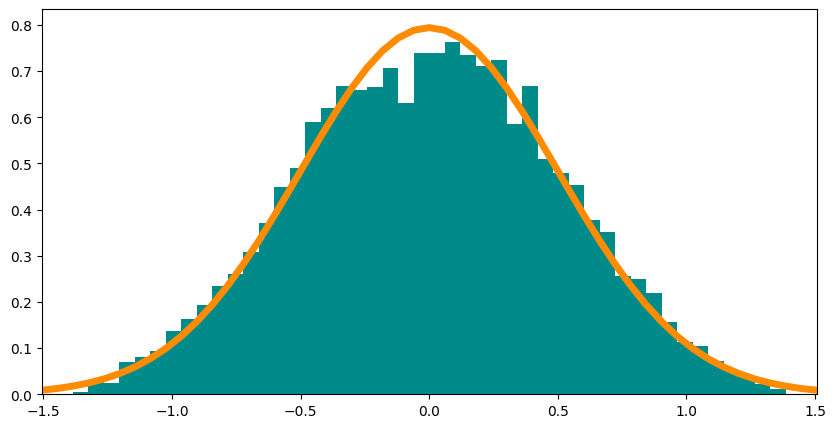

In [ ]:
distribution(3);

RMS = 0.28574054301853424


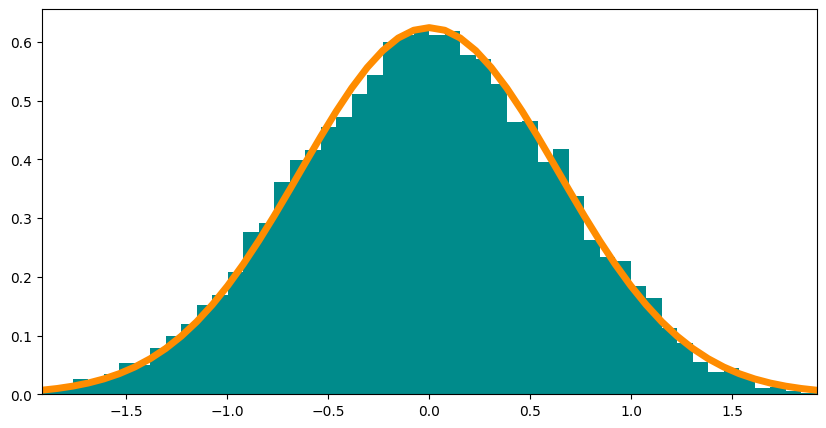

In [ ]:
distribution(5);

Para N=1 o histograma é retangular e para N=2 é triangular. A partir de N=3 ele já toma o formato de uma distribuição Gaussiana, sendo então uma boa aproximação.